# PUBG Finish Placement Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train_V2.csv", nrows = 100000)

In [3]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.233240,1.119330,130.659763,0.653720,0.222920,1.372880,47.597980,504.549130,0.923440,0.543630,...,0.16230,603.976697,0.003940,4.431591,0.023860,0.00759,1158.852715,3.674470,606.340150,0.473661
std,0.588475,1.724819,170.166440,1.143277,0.586711,2.669875,27.483175,626.860022,1.549013,0.712897,...,0.46139,1490.630207,0.083693,29.088230,0.165864,0.09018,1185.515461,2.461658,739.520887,0.307770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,156.000000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,83.850000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,694.800000,3.000000,0.000000,0.461500
75%,0.000000,2.000000,185.900000,1.000000,0.000000,2.000000,71.000000,1170.000000,1.000000,1.000000,...,0.00000,0.027725,0.000000,0.000000,0.000000,0.00000,1981.000000,5.000000,1495.000000,0.741900
max,13.000000,21.000000,3725.000000,32.000000,17.000000,47.000000,100.000000,2152.000000,35.000000,10.000000,...,9.00000,28450.000000,6.000000,1220.000000,4.000000,4.00000,13530.000000,61.000000,1972.000000,1.000000


# Preprocessing

In [4]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

As it can be seen that the attribute 'winPlacePrec' has a single null value.

In [5]:
index = df[df['winPlacePerc'].isnull()].index.tolist()
df.loc[index, 'numGroups']

Series([], Name: numGroups, dtype: int64)

It can be seen that this match has only one player. This can be thought of an illegal match and hence we remove this row.

In [7]:
df.drop(index, inplace=True)

# Exploratory Data Analysis

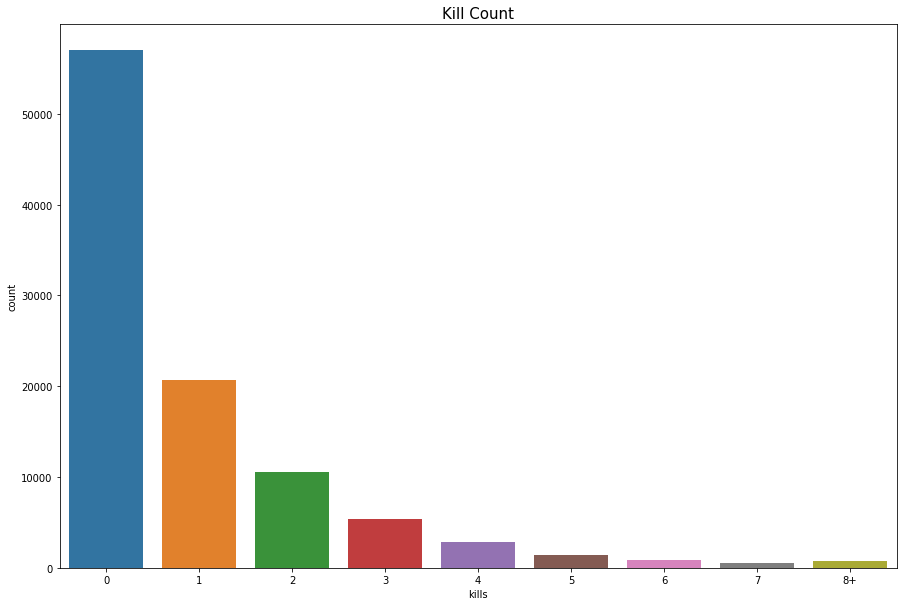

In [8]:
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

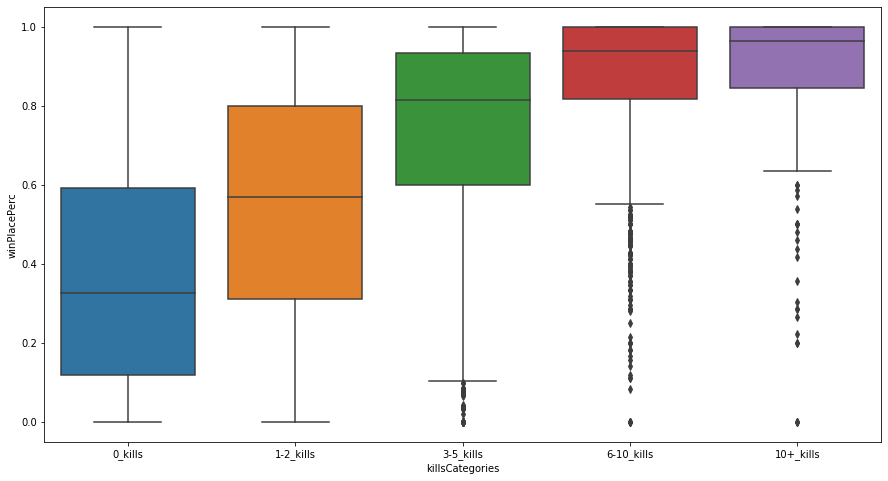

In [9]:
kills = df.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

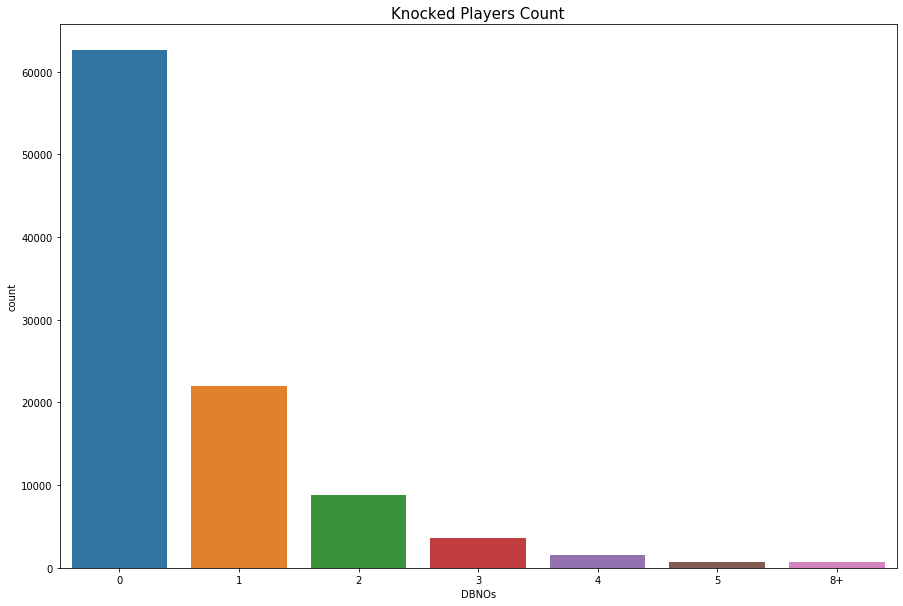

In [19]:
data = df.copy()
data.loc[data['DBNOs'] > data['DBNOs'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['DBNOs'].astype('str').sort_values())
plt.title("Knocked Players Count",fontsize=15)
plt.show()

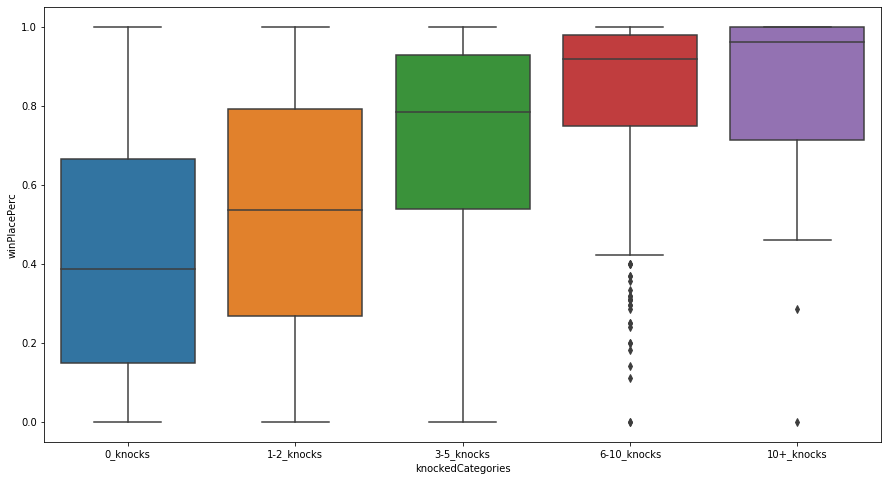

In [26]:
knocked = df.copy()

knocked['knockedCategories'] = pd.cut(knocked['DBNOs'], [-1, 0, 2, 5, 10, 60], labels=['0_knocks','1-2_knocks', '3-5_knocks', '6-10_knocks', '10+_knocks'])

plt.figure(figsize=(15,8))
sns.boxplot(x="knockedCategories", y="winPlacePerc", data=knocked)
plt.show()

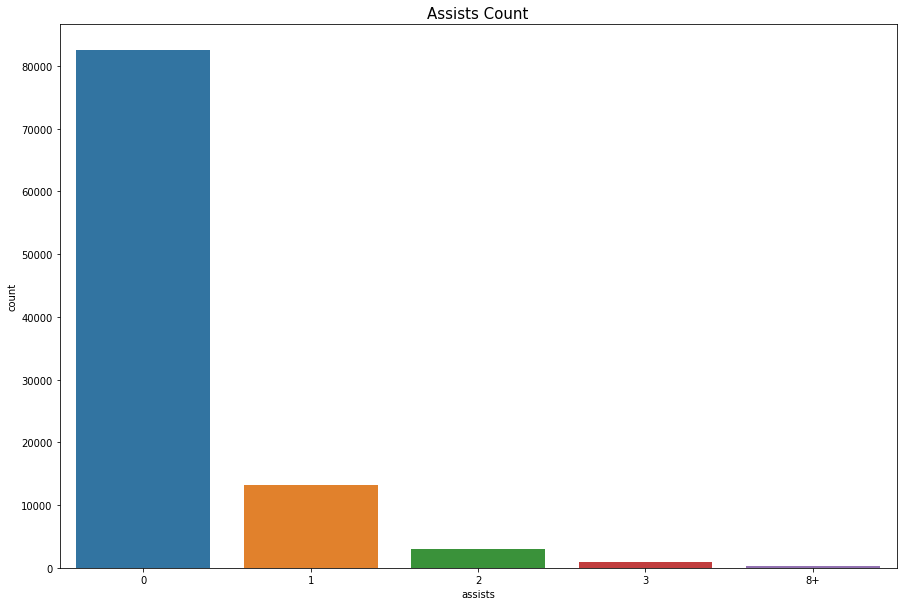

In [27]:
data = df.copy()
data.loc[data['assists'] > data['assists'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['assists'].astype('str').sort_values())
plt.title("Assists Count",fontsize=15)
plt.show()

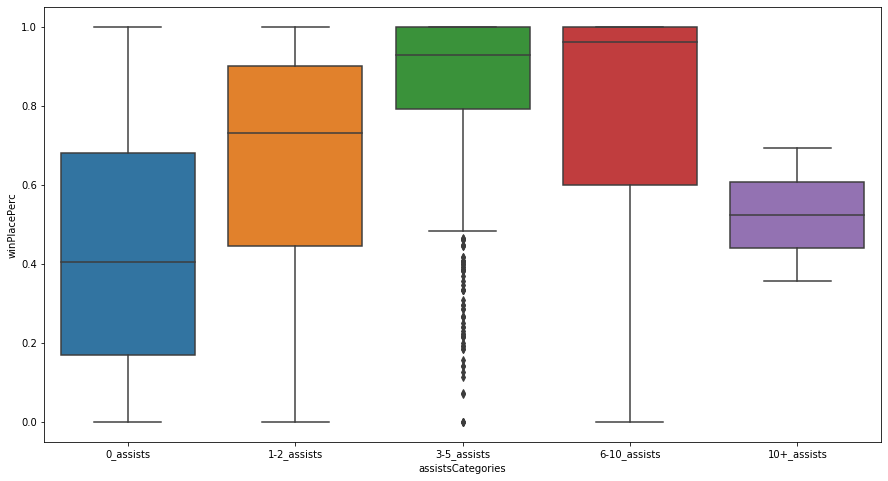

In [29]:
assists = df.copy()

assists['assistsCategories'] = pd.cut(assists['assists'], [-1, 0, 2, 5, 10, 60], labels=['0_assists','1-2_assists', '3-5_assists', '6-10_assists', '10+_assists'])

plt.figure(figsize=(15,8))
sns.boxplot(x="assistsCategories", y="winPlacePerc", data=assists)
plt.show()

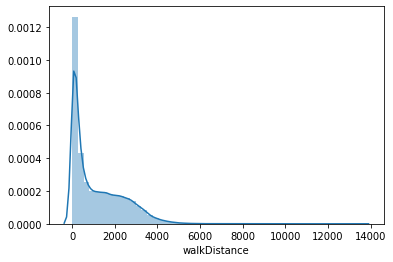

In [11]:
x = df.walkDistance
sns.distplot(x)

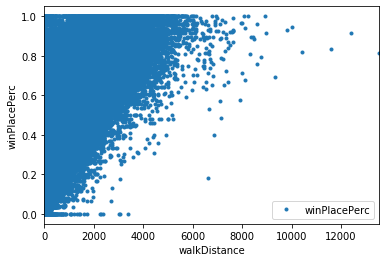

In [14]:
plot = df.plot(x='walkDistance', y='winPlacePerc', style='.')
y_label = plot.set_ylabel('winPlacePerc')

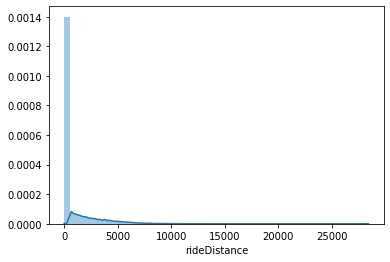

In [13]:
x = df.rideDistance
sns.distplot(x)

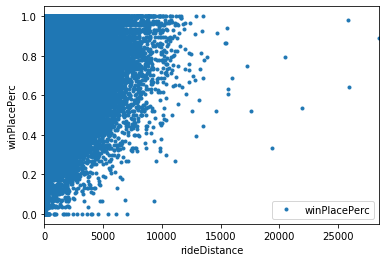

In [15]:
plot = df.plot(x='rideDistance', y='winPlacePerc', style='.')
y_label = plot.set_ylabel('winPlacePerc')

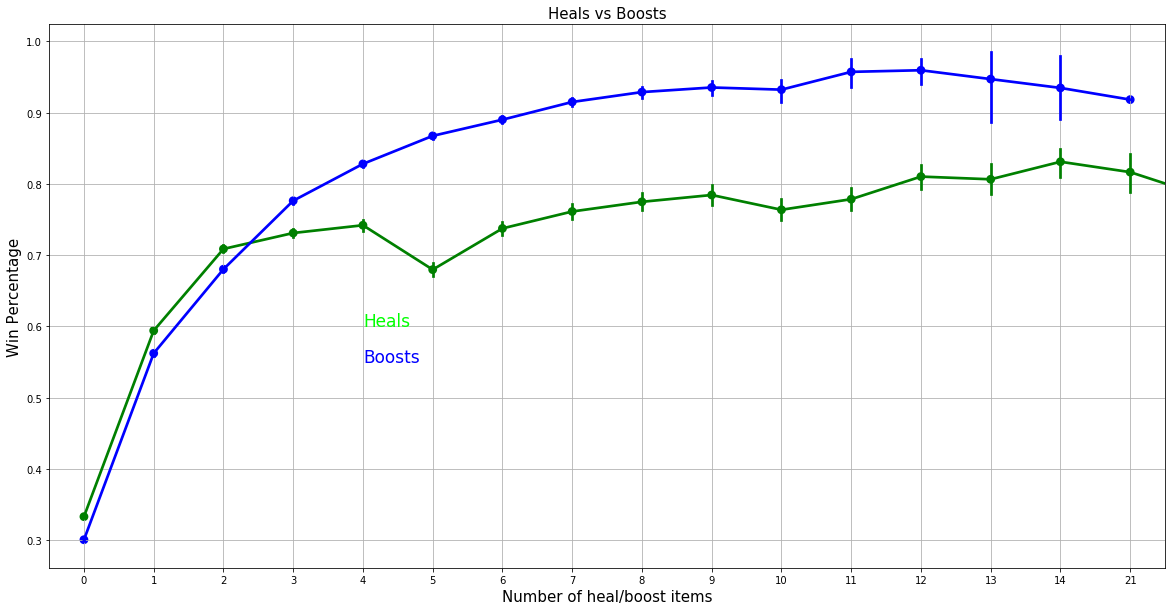

In [40]:
data = df.copy()

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='green',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17)
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17)
plt.xlabel('Number of heal/boost items',fontsize = 15)
plt.ylabel('Win Percentage',fontsize = 15)
plt.title('Heals vs Boosts',fontsize = 15)
plt.grid()
plt.show()

In [43]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1,0.305849,0.410536,0.308385,0.195232,0.230228,-0.29276,0.0334613,0.326113,0.246244,0.263219,-0.0208429,-0.148112,-0.146887,-0.0102673,0.195074,0.109979,0.0223557,0.0210176,0.00968069,0.0612364,0.290039,0.247621,0.0181101,0.299107
boosts,0.305849,1,0.519199,0.356099,0.331583,0.533811,-0.555092,0.00914621,0.497659,0.404991,0.420443,0.0762121,-0.0139896,-0.0129409,0.0223829,0.255606,0.32725,0.0393466,0.111882,0.0127333,0.0904849,0.640036,0.408285,-0.00679478,0.634672
damageDealt,0.410536,0.519199,1,0.737837,0.606893,0.349071,-0.681884,0.0483096,0.888662,0.705518,0.565425,-0.00311641,-0.0390482,-0.0382145,0.000456204,0.258902,0.137621,0.0563147,0.037439,0.0140719,0.0798447,0.400527,0.357541,0.0162879,0.441998
DBNOs,0.308385,0.356099,0.737837,1,0.473894,0.264741,-0.555567,0.0405403,0.710381,0.645716,0.44862,-0.0148327,-0.265741,-0.263857,-0.00167073,0.293675,0.0957212,0.0373559,0.0154929,0.0658252,0.0615739,0.28387,0.219347,0.00959232,0.278029
headshotKills,0.195232,0.331583,0.606893,0.473894,1,0.20281,-0.473077,0.0242457,0.668384,0.514115,0.452025,-0.0184981,0.00835522,0.00900462,0.00476559,0.153122,0.0741674,0.0151048,0.0266876,0.0106987,0.0330384,0.249428,0.219396,0.00508262,0.276568
heals,0.230228,0.533811,0.349071,0.264741,0.20281,1,-0.390215,0.00158127,0.316283,0.275308,0.265247,0.11265,-0.0615622,-0.0607497,0.0152466,0.236785,0.298219,0.0300332,0.0861188,0.0372671,0.0635046,0.432577,0.311178,-0.00673805,0.430759
killPlace,-0.29276,-0.555092,-0.681884,-0.555567,-0.473077,-0.390215,1,-0.0233773,-0.734024,-0.809311,-0.544254,-0.0127089,0.0135566,0.0155978,-0.0140177,-0.275554,-0.233485,-0.0592514,-0.092219,-0.036262,-0.0706414,-0.591376,-0.493597,-0.00311946,-0.719036
killPoints,0.0334613,0.00914621,0.0483096,0.0405403,0.0242457,0.00158127,-0.0233773,1,0.0325431,0.0356349,0.017727,-0.0995695,-0.046064,-0.0437041,-0.975449,0.015726,-0.0277065,-0.0107563,-0.00431583,-0.039034,-0.00586943,0.00559066,-0.0037749,0.983433,0.0161266
kills,0.326113,0.497659,0.888662,0.710381,0.668384,0.316283,-0.734024,0.0325431,1,0.805044,0.608594,-0.0285977,-0.00340813,-0.00229265,0.0118235,0.256846,0.110407,0.0729066,0.0374504,0.0164513,0.0796132,0.374326,0.341325,0.0036872,0.419061
killStreaks,0.246244,0.404991,0.705518,0.645716,0.514115,0.275308,-0.809311,0.0356349,0.805044,1,0.516609,-0.0329232,-0.0368679,-0.0355535,0.00424909,0.248051,0.0959351,0.0760609,0.0342879,0.0285767,0.0632126,0.327179,0.277652,0.00766671,0.37597


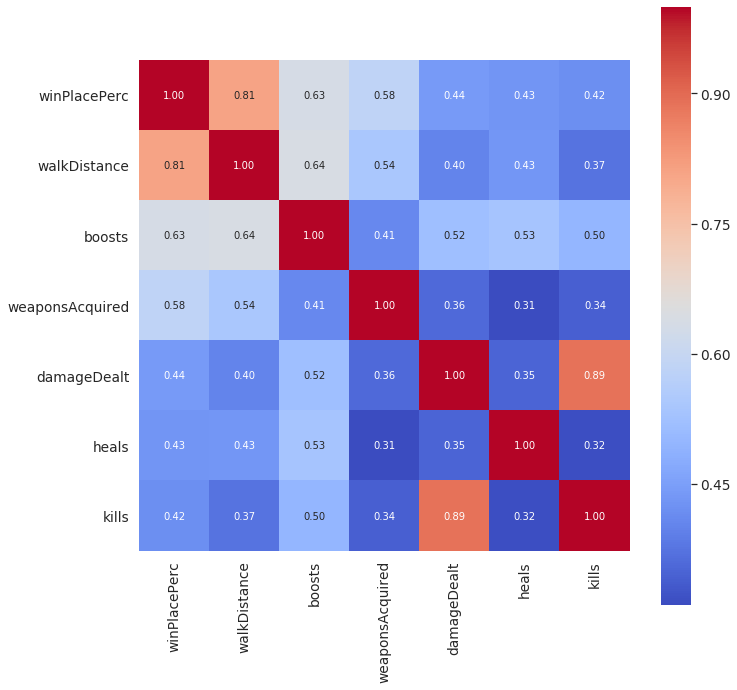

In [54]:
k = 7
f,ax = plt.subplots(figsize=(11, 11))
cols = df.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='coolwarm')
plt.show()